In [10]:
import numpy as np
import pandas as pd
import vpython as vs
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_boston
%matplotlib inline

data=pd.read_csv('housing.csv')
prices=data['medv']
features=data.drop('medv',axis=1)

print('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

Boston housing dataset has 506 data points with 14 variables each


In [11]:
minimum_price=np.min(prices)
maximum_price=np.max(prices)

mean_price=np.mean(prices)

median_price=np.median(prices)

std_price=np.std(prices)

first_quartile=np.percentile(prices,25)
third_quartile=np.percentile(prices,75)
inter_quartile=third_quartile-first_quartile

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))
print("First quartile of prices: ${:,.2f}".format(first_quartile))
print("Second quartile of prices: ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


ValueError: num must be 1 <= num <= 3, not 4

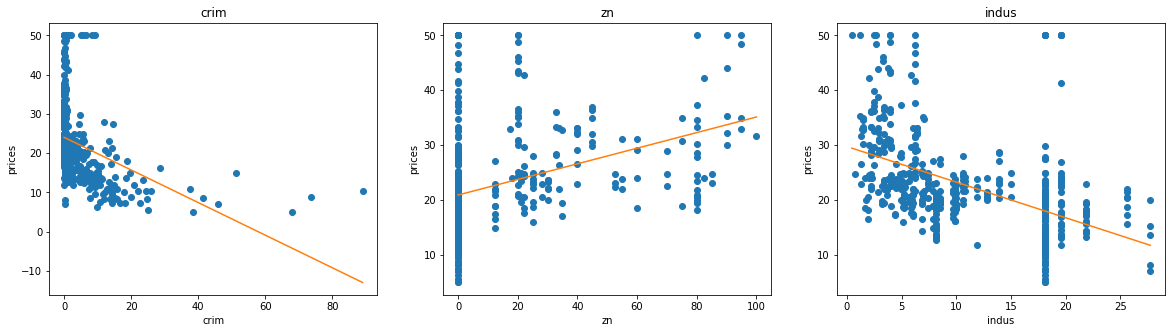

In [13]:

# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [14]:
from sklearn.metrics import r2_score

def performance_metric(y_true,y_predict):
    score=r2_score(y_true,y_predict)
    return score

score=performance_metric([3,-0.5,2,7,4.2],[2.5,0.0,2.1,7.8,5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [15]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


In [16]:
print(features.shape[0])
print(float(X_train.shape[0])/float(features.shape[0]))
print(float(X_test.shape[0])/float(features.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [17]:
from vpython import *
vs.ModelLearning(features,prices)


AttributeError: module 'vpython' has no attribute 'ModelLearning'

In [26]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    # ShuffleSplit works iteratively compared to KFOLD
    # It saves computation time when your dataset grows
    # X.shape[0] is the total number of elements
    # n_iter is the number of re-shuffling & splitting iterations.
    cv_sets = ShuffleSplit(X.shape[0], n_splits= 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    # Instantiate
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    dt_range = range(1, 11)
    params = dict(max_depth=dt_range)

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    # We initially created performance_metric using R2_score
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    # You would realize we manually created each, including scoring_func using R^2
    grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [25]:
from sklearn.model_selection import RandomizedSearchCV

def fit_model_2(X,y):
    
    cv_sets=ShuffleSplit(X.shape[0],n_iter=10,test_size=0.20,random_state=0)
    regressor=DecisionTreeRegressor(random_state=0)
    dt_range=range(1,11)
    params=dict(max_depth=dt_range)
    
    scoring_fnc=make_scorer(performance_metric)
    
    rand=RandomizedSearchCV(regressor,params,cv=cv_sets,scoring=scoring_fnc)
    rand=rand.fit(X,y)
    
    return rand.best_estimator_


In [28]:
reg=fit_model(X_train,y_train)

print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [29]:
reg = fit_model(X_train, y_train)
reg.get_params()



{'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [30]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))


ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 3 